[1. Introduction](#1)

[2. Brief Introduction About Natural Language Processing](#2)

[3. Bag of Word](#3)

[4. Importing Libraries and Data Set](#4)

[5. Text Analysis](#5)

[6. Heat Map](#6)

[7. Analysis and Visualisation of Target](#7)

[8. Analysis and Visualisation of Features](#8)

[9. Text Preprocessing](#9)

* [9.1 Removing Punctuations and StopWords](#9.1)

* [9.2 Removing StopWords](#9.2)

* [9.3 Removing Noise](#9.3)

* [9.4 Lowercasing](#9.4)

* [9.5 Tokenization](#9.6)

[10. Model creation Using LSTM](#10)

* [10.1 Splitting Text data](#10.1)

* [10.2 Embedding Layer](#10.2)

* [10.3 Long Short Term Memory – LSTM](#10.3)

[11. Evaluation](#11)

[12. Submission](#12)

[13. Reference](#13)




<a id="1"></a> <br>
# 1. Introduction

Twitter has become an important communication channel in times of emergency. The ubiquitousness of smartphones enables people to announce an emergency they’re observing in real-time. A machine learning model is built, that would predict which Tweets are about real disasters and which ones aren’t.

<a id="2"></a> <br>
# 2. Brief Introduction About Natural Language Processing

Natural Language Processing refers to the branch of artificial intelligence that gives machines the ability to read, understand and derive meaning from human languages. Robots such as Sophia or home assistants uses Natural Language Processing (NLP) to sound like human and 'understand' what you're saying. NLP can be represented by using the Venn diagram as below.

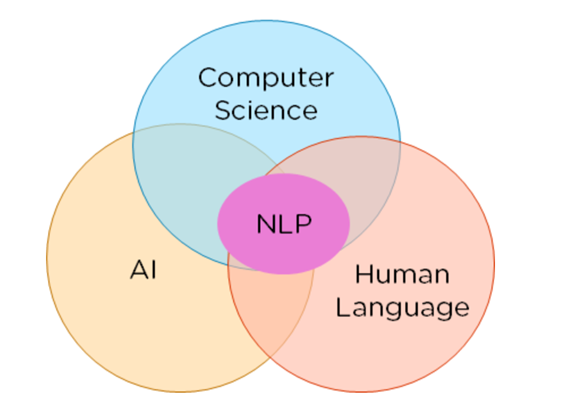

Natural language processing focuses on feature engineering and for this, we should have excellent domain knowledge of data. All the data are in the form of text or string. While modeling it with the machine learning classifier algorithm, it will require a numerical feature vector and for this "Bag of Word" can be used.

<a id="3"></a> <br>
# 3. Bag of Words

The bag-of-words model is used to extract features from the text by disregarding the grammar and order of words by keeping their multiple occurrences. It is represented as a bag of its words and here the occurrence of each word is used as a feature for the training classifier. It is mainly used in document classification and also used in computer vision.

For document classification, the word counts can be represented as a vector. We can use cosine similarity metrics is used to determine the similarity between these vectors by measuring cosine angle.

The cosine of two non-zero vectors can be derived by using the Euclidean dot product formula:

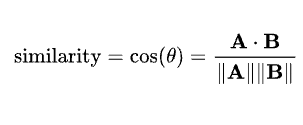

(1 - similarity) gives cosine distance between two vectors.

When the angle between two points is zero, cos(0) = 1, and cosine distance will be equal to (1–1) then is zero. It indicates the two are very the same.

<a id="4"></a> <br>
# 4. Importing Libraries and Data Set

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
#Libraries for visualisation
import seaborn as sns
import matplotlib.pyplot as plt

#Libraries for formattting and handling text 
import string 
import re

#Library for nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS


#Library for Splitting Dataset
from sklearn.model_selection import train_test_split


#Libraries for NN
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.stem import PorterStemmer, WordNetLemmatizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout

from tensorflow.keras.utils import plot_model

#Library for evaluation
from sklearn import metrics
from functools import reduce
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [ ]:
train_data = pd.read_csv('/kaggle/input/nlp-getting-started/train.csv')

<a id="5"></a> <br>
# 5. Text Analysis

In [ ]:
train_data.head().style.background_gradient(cmap='coolwarm')

In [ ]:
print("Number of rows is = ", train_data.shape[0], " \nNumber of columns is = " , train_data.shape[1]) 

In [ ]:
train_data.head()

<a id="6"></a> <br>
# 6. Heat Map

In [ ]:
sns.set(rc={'figure.figsize':(11,8)})
sns.heatmap(train_data.isnull(),yticklabels=False,cbar=False,cmap="coolwarm")

Here each red line indicates there is missing value and as per heat map of keyword and location have missing value. As for NLP model building we will be using only text and target, so there is no need to handle missing value.

<a id="7"></a> <br>
# 7. Analysis and Visualisation of Target

In [ ]:
train_data['target'].value_counts()

In [ ]:
plt.figure(figsize=(5,3))
colors = ["blue", "red"]

sns.countplot(x = 'target', data=train_data, palette=colors)
plt.title('Target Distributions \n (0: Non Disaster || 1: Disaster)', fontsize=14)

<a id="8"></a> <br>
# 8. Analysis and Visualisation of Features

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;
          text-align:center;">Keyword</p>

             

</div>

In [ ]:
train_data["keyword"].nunique()

## Plotting top 20 keywords

In [ ]:
chains=train_data['keyword'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Top 20 Keywords")
plt.xlabel("Count of Keywords")

## Plotting top 20 disaster and non disaster keywords

In [ ]:
disaster_keywords = train_data.loc[train_data["target"] == 1]["keyword"].value_counts()
nondisaster_keywords = train_data.loc[train_data["target"] == 0]["keyword"].value_counts()

fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.barplot(y=disaster_keywords[0:20].index, x=disaster_keywords[0:20], orient='h', ax=ax[0], palette="Reds_d")
ax[0].set_title("Top 20 Keywords - Disaster Tweets")
ax[0].set_xlabel("Keyword Frequency")

sns.barplot(y=nondisaster_keywords[0:20].index, x=nondisaster_keywords[0:20], orient='h', ax=ax[1], palette="Blues_d")
ax[1].set_title("Top 20 Keywords - Non-Disaster Tweets")
ax[1].set_xlabel("Keyword Frequency")


plt.tight_layout()
plt.show()

## Plotting highest usage disaster keyword and lowest usage disaster keyword

In [ ]:
top_disaster_keyword = train_data.groupby('keyword').mean()['target'].sort_values(ascending = False).head(20)
top_nondisaster_keyword = train_data.groupby('keyword').mean()['target'].sort_values().head(20)

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20,8))

sns.barplot(y=top_disaster_keyword[0:20].index, x=disaster_keywords[0:20], orient='h', ax=ax[0], palette="Reds_d")
ax[0].set_title("Top 20 Keywords - Highest used Disaster Keyword")
ax[0].set_xlabel("Keyword Frequency")


sns.barplot(y=top_nondisaster_keyword[0:20].index, x=top_nondisaster_keyword[0:20], orient='h', ax=ax[1], palette="Blues_d")
ax[1].set_title("Top 20 Keywords - Least used Non-Disaster Tweets")
ax[1].set_xlabel("Keyword Frequency")


plt.tight_layout()
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;
          text-align:center;">Location</p>

             

</div>

In [ ]:
locations = train_data["location"].value_counts()

## Plotting top 20 locations of tweets

In [ ]:
plt.figure(figsize=(10,7))


sns.barplot(y=locations[0:20].index, x=locations[0:20], orient='h')

plt.title("Top 20 Locations")
plt.show()

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;
          text-align:center;">Text</p>

             

</div>

In [ ]:
print(len(train_data['text']))

We can create a column length in train_data, which will have length of each text.

In [ ]:
train_data["length"]  = train_data["text"].apply(len)
train_data.head()

In [ ]:
train_data['length'].describe()

In [ ]:
train_data[train_data['length']==157]['text'].iloc[0]

Here the maximum length word is having repeated punctuations. So the important information delivered is very less.

## Plotting tweets length 

In [ ]:
plt.figure(figsize=(5,3))
sns.histplot(train_data["length"], kde=True,color='purple',bins=30)
plt.title("Length of tweets")
plt.xlabel("Number of Characters")
plt.ylabel("Density")
plt.show()

## Plotting tweets length wrt target

In [ ]:
train_data.hist(column='length', by = 'target',bins =60, figsize= (10,3))

## Plotting number of words in tweets

Column "num_word" is to be created, which will have number of words in each tweet.

In [ ]:
def count_words(x):
    return len(x.split())

train_data["num_words"] = train_data["text"].apply(count_words)

plt.figure(figsize=(5,3))
sns.histplot(train_data["num_words"],kde=True,color='purple',bins=30)
plt.title("Histogram of Number of Words per Tweet")
plt.xlabel("Number of Words")
plt.ylabel("Density")
plt.show()

## Plotting number of words in tweets wrt target

In [ ]:
train_data.hist(column='num_words', by = 'target',bins =60, figsize= (10,3))

<a id="9"></a> <br>
# 9. Text Preprocessing

<a id="9.1"></a> <br>
* 9.1 Removing Punctuations

string.punctuation will give the punctuations.

In [ ]:
string.punctuation

We can create a function 'toclean_text' to remove punctuations, and then it can used to clean text column of training data.

In [ ]:
def toclean_text(text):

    
    clean_text = [char for char in text if char not in string.punctuation]
   
    clean_text = ''.join(clean_text)
    
        
    return clean_text

Function 'toclean_text', will remove punctuations in a text. Now we apply it to training data and create a column clean_text for the training data, which will have text without puntuations.

In [ ]:
train_data['clean_text'] = train_data['text'].apply(toclean_text)

In [ ]:
train_data.head()

<a id="9.2"></a> <br>
* 9.2 Removing Noise

Noise in a text can be considered as anything which does belong to normal human language interaction.

Noise in the text can generally be considered as URL, abbreviations, emojis, message inside HTML tag, etc. Punctuations can also be considered as noise. But here we have already removed punctuations. 

The main reason why abbreviations are included as noise is that some people write thx for thankyou. If abbreviations are not replaced with the original word, 'thx' and 'thankyou' will be considered as two different words. 

In [ ]:
abbreviations = {
    "$" : " dollar ",
    "€" : " euro ",
    "4ao" : "for adults only",
    "a.m" : "before midday",
    "a3" : "anytime anywhere anyplace",
    "aamof" : "as a matter of fact",
    "acct" : "account",
    "adih" : "another day in hell",
    "afaic" : "as far as i am concerned",
    "afaict" : "as far as i can tell",
    "afaik" : "as far as i know",
    "afair" : "as far as i remember",
    "afk" : "away from keyboard",
    "app" : "application",
    "approx" : "approximately",
    "apps" : "applications",
    "asap" : "as soon as possible",
    "asl" : "age, sex, location",
    "atk" : "at the keyboard",
    "ave." : "avenue",
    "aymm" : "are you my mother",
    "ayor" : "at your own risk", 
    "b&b" : "bed and breakfast",
    "b+b" : "bed and breakfast",
    "b.c" : "before christ",
    "b2b" : "business to business",
    "b2c" : "business to customer",
    "b4" : "before",
    "b4n" : "bye for now",
    "b@u" : "back at you",
    "bae" : "before anyone else",
    "bak" : "back at keyboard",
    "bbbg" : "bye bye be good",
    "bbc" : "british broadcasting corporation",
    "bbias" : "be back in a second",
    "bbl" : "be back later",
    "bbs" : "be back soon",
    "be4" : "before",
    "bfn" : "bye for now",
    "blvd" : "boulevard",
    "bout" : "about",
    "brb" : "be right back",
    "bros" : "brothers",
    "brt" : "be right there",
    "bsaaw" : "big smile and a wink",
    "btw" : "by the way",
    "bwl" : "bursting with laughter",
    "c/o" : "care of",
    "cet" : "central european time",
    "cf" : "compare",
    "cia" : "central intelligence agency",
    "csl" : "can not stop laughing",
    "cu" : "see you",
    "cul8r" : "see you later",
    "cv" : "curriculum vitae",
    "cwot" : "complete waste of time",
    "cya" : "see you",
    "cyt" : "see you tomorrow",
    "dae" : "does anyone else",
    "dbmib" : "do not bother me i am busy",
    "diy" : "do it yourself",
    "dm" : "direct message",
    "dwh" : "during work hours",
    "e123" : "easy as one two three",
    "eet" : "eastern european time",
    "eg" : "example",
    "embm" : "early morning business meeting",
    "encl" : "enclosed",
    "encl." : "enclosed",
    "etc" : "and so on",
    "faq" : "frequently asked questions",
    "fawc" : "for anyone who cares",
    "fb" : "facebook",
    "fc" : "fingers crossed",
    "fig" : "figure",
    "fimh" : "forever in my heart", 
    "ft." : "feet",
    "ft" : "featuring",
    "ftl" : "for the loss",
    "ftw" : "for the win",
    "fwiw" : "for what it is worth",
    "fyi" : "for your information",
    "g9" : "genius",
    "gahoy" : "get a hold of yourself",
    "gal" : "get a life",
    "gcse" : "general certificate of secondary education",
    "gfn" : "gone for now",
    "gg" : "good game",
    "gl" : "good luck",
    "glhf" : "good luck have fun",
    "gmt" : "greenwich mean time",
    "gmta" : "great minds think alike",
    "gn" : "good night",
    "g.o.a.t" : "greatest of all time",
    "goat" : "greatest of all time",
    "goi" : "get over it",
    "gps" : "global positioning system",
    "gr8" : "great",
    "gratz" : "congratulations",
    "gyal" : "girl",
    "h&c" : "hot and cold",
    "hp" : "horsepower",
    "hr" : "hour",
    "hrh" : "his royal highness",
    "ht" : "height",
    "ibrb" : "i will be right back",
    "ic" : "i see",
    "icq" : "i seek you",
    "icymi" : "in case you missed it",
    "idc" : "i do not care",
    "idgadf" : "i do not give a damn fuck",
    "idgaf" : "i do not give a fuck",
    "idk" : "i do not know",
    "ie" : "that is",
    "i.e" : "that is",
    "ifyp" : "i feel your pain",
    "IG" : "instagram",
    "iirc" : "if i remember correctly",
    "ilu" : "i love you",
    "ily" : "i love you",
    "imho" : "in my humble opinion",
    "imo" : "in my opinion",
    "imu" : "i miss you",
    "iow" : "in other words",
    "irl" : "in real life",
    "j4f" : "just for fun",
    "jic" : "just in case",
    "jk" : "just kidding",
    "jsyk" : "just so you know",
    "l8r" : "later",
    "lb" : "pound",
    "lbs" : "pounds",
    "ldr" : "long distance relationship",
    "lmao" : "laugh my ass off",
    "lmfao" : "laugh my fucking ass off",
    "lol" : "laughing out loud",
    "ltd" : "limited",
    "ltns" : "long time no see",
    "m8" : "mate",
    "mf" : "motherfucker",
    "mfs" : "motherfuckers",
    "mfw" : "my face when",
    "mofo" : "motherfucker",
    "mph" : "miles per hour",
    "mr" : "mister",
    "mrw" : "my reaction when",
    "ms" : "miss",
    "mte" : "my thoughts exactly",
    "nagi" : "not a good idea",
    "nbc" : "national broadcasting company",
    "nbd" : "not big deal",
    "nfs" : "not for sale",
    "ngl" : "not going to lie",
    "nhs" : "national health service",
    "nrn" : "no reply necessary",
    "nsfl" : "not safe for life",
    "nsfw" : "not safe for work",
    "nth" : "nice to have",
    "nvr" : "never",
    "nyc" : "new york city",
    "oc" : "original content",
    "og" : "original",
    "ohp" : "overhead projector",
    "oic" : "oh i see",
    "omdb" : "over my dead body",
    "omg" : "oh my god",
    "omw" : "on my way",
    "p.a" : "per annum",
    "p.m" : "after midday",
    "pm" : "prime minister",
    "poc" : "people of color",
    "pov" : "point of view",
    "pp" : "pages",
    "ppl" : "people",
    "prw" : "parents are watching",
    "ps" : "postscript",
    "pt" : "point",
    "ptb" : "please text back",
    "pto" : "please turn over",
    "qpsa" : "what happens",
    "ratchet" : "rude",
    "rbtl" : "read between the lines",
    "rlrt" : "real life retweet", 
    "rofl" : "rolling on the floor laughing",
    "roflol" : "rolling on the floor laughing out loud",
    "rotflmao" : "rolling on the floor laughing my ass off",
    "rt" : "retweet",
    "ruok" : "are you ok",
    "sfw" : "safe for work",
    "sk8" : "skate",
    "smh" : "shake my head",
    "sq" : "square",
    "srsly" : "seriously", 
    "ssdd" : "same stuff different day",
    "tbh" : "to be honest",
    "tbs" : "tablespooful",
    "tbsp" : "tablespooful",
    "tfw" : "that feeling when",
    "thks" : "thank you",
    "tho" : "though",
    "thx" : "thank you",
    "tia" : "thanks in advance",
    "til" : "today i learned",
    "tl;dr" : "too long i did not read",
    "tldr" : "too long i did not read",
    "tmb" : "tweet me back",
    "tntl" : "trying not to laugh",
    "ttyl" : "talk to you later",
    "u" : "you",
    "u2" : "you too",
    "u4e" : "yours for ever",
    "utc" : "coordinated universal time",
    "w/" : "with",
    "w/o" : "without",
    "w8" : "wait",
    "wassup" : "what is up",
    "wb" : "welcome back",
    "wtf" : "what the fuck",
    "wtg" : "way to go",
    "wtpa" : "where the party at",
    "wuf" : "where are you from",
    "wuzup" : "what is up",
    "wywh" : "wish you were here",
    "yd" : "yard",
    "ygtr" : "you got that right",
    "ynk" : "you never know",
    "zzz" : "sleeping bored and tired"
}

In [ ]:
# Remove all URLs, replace by URL
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'URL',text)

# Remove HTML beacon
def remove_HTML(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Remove non printable characters
def remove_not_ASCII(text):
    text = ''.join([word for word in text if word in string.printable])
    return text

# Change an abbreviation by its true meaning
def word_abbrev(word):
    return abbreviations[word.lower()] if word.lower() in abbreviations.keys() else word

# Replace all abbreviations
def replace_abbrev(text):
    string = ""
    for word in text.split():
        string += word_abbrev(word) + " "        
    return string

# Remove @ and mention, replace by USER
def remove_mention(text):
    at=re.compile(r'@\S+')
    return at.sub(r'USER',text)

# Remove numbers, replace it by NUMBER
def remove_number(text):
    num = re.compile(r'[-+]?[.\d]*[\d]+[:,.\d]*')
    return num.sub(r'NUMBER', text)

# Remove all emojis, replace by EMOJI
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'EMOJI', text)

# Replace some others smileys with SADFACE
def transcription_sad(text):
    eyes = "[8:=;]"
    nose = "['`\-]"
    smiley = re.compile(r'[8:=;][\'\-]?[(\\/]')
    return smiley.sub(r'SADFACE', text)

# Replace some smileys with SMILE
def transcription_smile(text):
    eyes = "[8:=;]"
    nose = "['`\-]"
    smiley = re.compile(r'[8:=;][\'\-]?[)dDp]')
    #smiley = re.compile(r'#{eyes}#{nose}[)d]+|[)d]+#{nose}#{eyes}/i')
    return smiley.sub(r'SMILE', text)

# Replace <3 with HEART
def transcription_heart(text):
    heart = re.compile(r'<3')
    return heart.sub(r'HEART', text)



In [ ]:
def clean_tweet(text):
    
    # Remove non text
    text = remove_URL(text)
    text = remove_HTML(text)
    text = remove_not_ASCII(text)
    
    # replace abbreviations, @ and number
    text = replace_abbrev(text)  
    text = remove_mention(text)
    text = remove_number(text)
    
    # Remove emojis / smileys
    text = remove_emoji(text)
    text = transcription_sad(text)
    text = transcription_smile(text)
    text = transcription_heart(text)
  
    return text

Function clean_tweet() will remove all the noise in the text.

In [ ]:
train_data["clean_text"] = train_data["clean_text"].apply(clean_tweet)

In [ ]:
train_data.head()

<a id="9.3"></a> <br>
* 9.3 Removing Stopwords

Stopwords are commonly used words, which do not have any distinguishing features, like "a", "an", "the", so on… and search engine is programmed to ignore them while indexing entries and while retrieving the results of a search query. It  saves space in the database and decreases processing speed. 

Natural Language Toolkit(nlkt) in python has a list of stopwords stored in 16 different languages. It is a leading platform for building a python program to work with human language data.

In [ ]:
print(stopwords.words('english'))

In [ ]:
def toremove_stopword(text):
    remove_stopword = [word for word in text.split() if word.lower() not in stopwords.words('english')]

    return remove_stopword

In [ ]:
train_data['clean_text'] = train_data['clean_text'].apply(toremove_stopword)

In [ ]:
train_data.head()

<a id="9.4"></a> <br>
* 9.4 Lowercasing

Lowercasing is a preprocessing method in which the text is converted into the lower case. In tokenization, Keras tokenizer is used, which will be converting texts to lowercase.

So here there is no need for lowercasing the texts as it will be a duplicate work.


<a id="9.5"></a> <br>
* 9.5 Tokenization

Tokenization generally decomposes text documents into small tokens and constructs a document word matrix. A document can be considered as a bag of words. Collection of document is called Corpus.

In document word matrix :
* Each Row represents a document (bag of words)
* Each column distinct token
* Each cell represents the frequency of occurrence of the token


Here Keras Tokenizer() is used which is supported by Tensorflow as a high-level API that encodes the token to a numerical value. The main reason to use this is in LSTM input is provided by embedding layer, which requires input data to be integer encoded.

Parameter 'num_words' can be used to restrict the number of the token to considered by the model.


Tokenizer() uses fit_on_texts() and texts_to_sequences() to encode the texts to numerical values.

1.	Fit_on_texts() Updates internal vocabulary based on a list of texts. It will create a dictionary with word mapping with an index (unique numerical value). Here all the words will be in lower case and the least value of index will be the more frequent word.

2.	texts_to_sequences() Transforms each text in texts to a sequence of numerical value. It will give assign the index of each to the word. So the output will be series of numerical values.

In [ ]:
max_features=3000
tokenizer=Tokenizer(num_words=max_features,split=' ')
tokenizer.fit_on_texts(train_data['clean_text'].values)
X = tokenizer.texts_to_sequences(train_data['clean_text'].values)
X = pad_sequences(X)

We are not be having the same length for all the sentences and while providing input to neural networks, we should have the same dimension for all inputs. So pad_sequence() is used to pad the input so that all the inputs have the same dimension. It will add zeros to the input, in the beginning, to make sure all the inputs have the same dimension.

In [ ]:
X.shape

Here size of tokenized vector is 20, it is the maximum length of clean_text considering excluding those tokens which does not belong to top 3000 tokens. That is if the maximum length of clean_text is 35, then the 15 token will not be qualified to come under top 3000 tokens.

We can restrict on enhance dimension of tokenized vector by providing a parameter maxlen to pad_sequence().

In [ ]:
X[0]

In X[0] out 7 cleaned word only 5 belong to top 3000 words. 

In [ ]:
tokenizer.sequences_to_texts([[ 713,  154,   56, 1434,   14]])

Other words in the first column does not belong to top 3000 tokens.

<a id="10"></a> <br>
# 10. Model creation Using LSTM

<a id="10.1"></a> <br>
* 10.1 Splitting Text data

In [ ]:
y = train_data['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state =41)

<a id="10.2"></a> <br>
* 10.2 Embedding Layer

Embedding layer is the first layer of neural network and it has 3 parameters:

* input_dim: Number of distinct token vector, here it will be 3000 (max_features)
* output_dim: Dimension of embedding vector, we can take 32 dimension
* input_length: Size of input layer 

Here embedding layer of size will be (3000, 32).


<a id="10.3"></a> <br>
* 10.3 Long Short Term Memory - LSTM

LSTM is an artificial recurrent neural network specially designed to avoid for long term dependency problem. LSTM have 4 neural network layer.

Each LSTM has 4 layers 

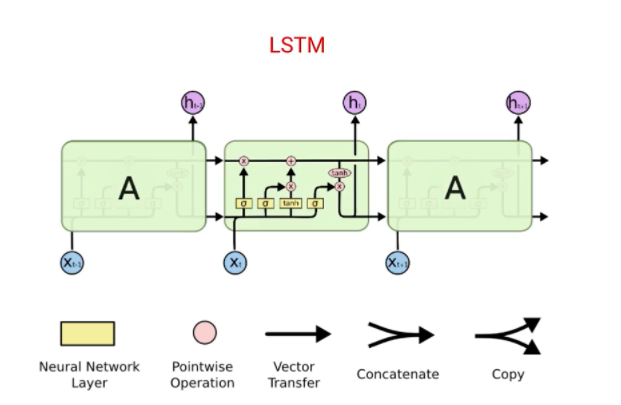

Yellow shows 4 neural network layer, 3 of them is having sigmoid activation function (output will be 0 or 1) and one is having tanh activation function( output will range from -1 to 1).

LSTM has 3 gates:

* 	Forget Gate: - It decides which information from the previous timestamp is irrelevant and can be forgotten. It has first neural network layer with sigmoid function.

* 	Input Gate: Try to learn new information from the input to the cell. It has 2 neural layers first one with sigmoid activation function and second one with tanh function. First, a sigmoid layer called the “input gate layer” decides which values to update. Next, is the tanh layer creates a vector of new candidate values.

* 	Output Gate: It passes the information from the current timestamp to the next. It has sigmoid activation function.

In input gate the sigmoid layer which decides what parts of the cell state is going to output. Then, we put the cell state through to tanh and multiply it by the output of the sigmoid gate, so that we only output the parts we decided to.

In [ ]:
os.environ['TF_XLA_FLAGS'] = '--tf_xla_enable_xla_devices'

In [ ]:
embed_dim = 32
lstm_out = 32
model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
model.add(Dropout(0.2))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.4))
model.add(Dense(1,activation='sigmoid'))
adam = optimizers.Adam(learning_rate=0.002)
model.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy'])
print(model.summary())

* Activation Function of Dense layer, i.e, is output layer is taken as Sigmoid function is taken as it is good at binary classification and our target column have value either 0 or 1.  
 
* Dropout : It is added to avoid overfitting.

* Loss Function : The cross-entropy loss function is an optimization function that is used in the case of training a classification model and binary_crossentropy function computes the cross-entropy loss between true labels and predicted labels.

* optimizer : Adam is used as optimizer which is replacement optimization algorithm for stochastic gradient descent for training deep learning models. Default learning rate of Adam is 0.001, but here I have initialized it to 0.002.

In [ ]:
model.fit(X_train, y_train, epochs = 10, batch_size=32, validation_data=(X_test, y_test))

In [ ]:
  y_pred = model.predict(X_test).round()

In [ ]:
y_pred

<a id="11"></a> <br>
# 11. Evaluation

In [ ]:
train_accuracy = round(metrics.accuracy_score(y_train,model.predict(X_train).round())*100)
train_accuracy

In [ ]:
print('Accuracy  is  : ', (metrics.accuracy_score(y_test, y_pred)))
print('Recall  is    : ', (metrics.recall_score(y_test, y_pred)))
print('Precision  is : ', (metrics.precision_score(y_test, y_pred)))

* Confusion Matrix

In [ ]:
conm = confusion_matrix(y_test,y_pred)
conm

In [ ]:
plt.figure(figsize=(7, 5))
sns.heatmap(conm, annot=True, fmt='d', cmap='cool')
plt.show()

* Classification Report

In [ ]:
print(classification_report(y_test, y_pred))

As Accuracy, Precision, recall and F1 score are above 70 % this model can be considered as good model. 

By changing dimension on Embedding Layer, max_features, LSTM can check if the evalution factors are improving or not.

<a id="12"></a> <br>
# 12. Submission

In [ ]:
test_data = pd.read_csv('../input/nlp-getting-started/test.csv')

In [ ]:
test_data.head().style.background_gradient(cmap='coolwarm')

For submission stopwords are not removing, as words like 'not' has a major role in distinguishing disaster and non-disaster tweet.

In [ ]:
test_data['clean_text'] = test_data['text'].apply(toclean_text)
test_data["clean_text"] = test_data["clean_text"].apply(clean_tweet)

In [ ]:
test_data['clean_text'].head()

## Creating New Model for submission with 

max_features = 5000

l =50

learning_rate=2e-3

lstm_out = 100

Adding two layers of LSTM



In [ ]:
l =50
max_features=5000
tokenizer=Tokenizer(num_words=max_features,split=' ')
tokenizer.fit_on_texts(train_data['clean_text'].values)
X = tokenizer.texts_to_sequences(train_data['clean_text'].values)
X = pad_sequences(X, maxlen =l)

In [ ]:
tokenizer.fit_on_texts(train_data['clean_text'].values)
test_token = tokenizer.texts_to_sequences(test_data['clean_text'].values)
test_token = pad_sequences(test_token, maxlen =l)

In [ ]:
embed_dim = 100
lstm_out = 100
model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
model.add(Dropout(0.2))
model.add(LSTM(lstm_out, dropout=0.2, return_sequences=True,recurrent_dropout=0.4))
model.add(Dropout(0.2))
model.add(LSTM(lstm_out,dropout=0.2, recurrent_dropout=0.2))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))
adam = optimizers.Adam(learning_rate=2e-3)
model.compile(loss = 'binary_crossentropy', optimizer=adam ,metrics = ['accuracy'])
print(model.summary())

In [ ]:
plot_model(model, to_file='model.png')

In [ ]:
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [ ]:
model.fit(X,y, epochs = 10,validation_split = 0.2 ,callbacks=[es_callback], batch_size=32)

In [ ]:
y_hat = model.predict(test_token).round()
submission = pd.read_csv("/kaggle/input/nlp-getting-started/sample_submission.csv")
submission['target'] = np.round(y_hat).astype('int')
submission.to_csv('submission.csv', index=False)
submission.describe().style.background_gradient(cmap='coolwarm')


In [ ]:
submission.target.value_counts().plot.bar();

<a id="13"></a> <br>
# 13. Reference

https://en.wikipedia.org/wiki/Cosine_similarity

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer

https://colah.github.io/posts/2015-08-Understanding-LSTMs/